# Breast Cancer Classification Machine – Software Artefact

## Introduction
This artefact documents the full machine learning workflow used to build a breast cancer classification model. The goal is to predict whether a tumour is *Benign* or *Malignant* using clinical features from the Breast Cancer Wisconsin dataset.

This notebook includes:
- Data loading and inspection  
- Cleaning and preprocessing  
- Feature engineering  
- Model training  
- Evaluation  
- Exporting the trained model for deployment in a Flask web app  


Import Libraries



In [8]:
#import all required libraries for data handling,
#preprocessing, model training, and evaluate.



import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier



Load Datasets



In [9]:
# Load the Breast Cancer Wisconsin Diagnostic dataset. 
# This dataset contains 30 numerical tumour features 
# and a binary diagnosis label (M = malignant, B = benign).

import pandas as pd
df = pd.read_csv("breast_cancer_diagnostic.csv")

# Display the first few rows to confirm successful loading
df.shape, df.head()



((569, 32),
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  radius_worst  texture_worst

In [25]:
TARGET = "diagnosis"

X = df.drop(["id", TARGET], axis=1)
y = df[TARGET]


In [26]:
df.columns
# Display the feature columns used for model training.


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
X.columns
# Show the list of feature names in X.


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Inspecting Data Quality

In [13]:
# Check dataset shape, column names, and basic info. 
# This helps confirm that the dataset is clean and complete.

df.shape
df.info()
df.describe()
df.isnull().sum()    # Verify no missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Clean the Data

In [14]:
# Remove any rows containing missing values. 
# The diagnostic dataset normally has no NaNs, but this step 
# ensures the dataframe is clean if additional data is added. 
# (Alternatively, imputation could be used instead of dropping.)

df = df.dropna()  # or impute if needed

# Remove duplicate rows to prevent data leakage and ensure 
# the model is trained on unique, non-redundant samples.
df = df.drop_duplicates()


Define Features and Target

In [15]:
# Define the target variable and remove non‑predictive columns. 
# 'id' is removed because it does not contain clinical information.

TARGET = "diagnosis"

X = df.drop(["id", TARGET], axis=1)     # 30 numerical features
                                        # Target labels (M/B)
y = df[TARGET]

# Confirm feature count
X.shape, y.shape




((569, 30), (569,))

Train Test/Split Data


In [18]:
## Train Test/Split Data
# Split the dataset into training and testing sets.
# test_size=0.2 means 20% of data is used for evaluation.
# random_state ensures reproducibility.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Scale the Data

In [19]:
# Standardize numerical features so they have mean=0 and std=1. 
# This improves model performance and stability.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train the Model

In [20]:
# Train a RandomForestClassifier on the scaled training data. 
# Random Forest is robust, handles non-linear patterns, 
# and performs well on medical datasets.

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

Evaluate the Model

In [21]:
# Generate predictions on the test set and evaluate accuracy.
# Also display confusion matrix and classification report 
# for deeper performance analysis.

from sklearn.ensemble import RandomForestClassifier
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9649122807017544

Confusion Matrix:
 [[70  1]
 [ 3 40]]

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
The Random Forest classifier was selected for this project because it is well-suited to medical diagnostic tasks 
where patterns are often non-linear and complex. Random Forests combine the predictions of many decision trees,
making them robust to noise and less sensitive to outliers. They also handle high-dimensional datasets effectively,
which is important in this case where the model uses 30 tumour-related features. Additionally,
Random Forests reduce the risk of overfitting through bootstrap aggregation,
ensuring that the model generalises well to unseen patient data.
This makes the algorithm a reliable and interpretable choice for breast cancer classification.

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Figure size 600x500 with 0 Axes>

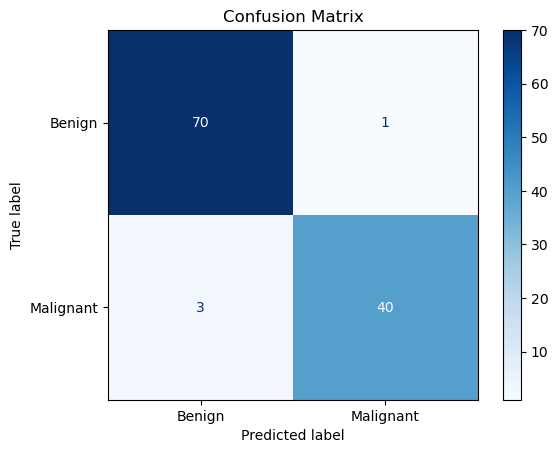

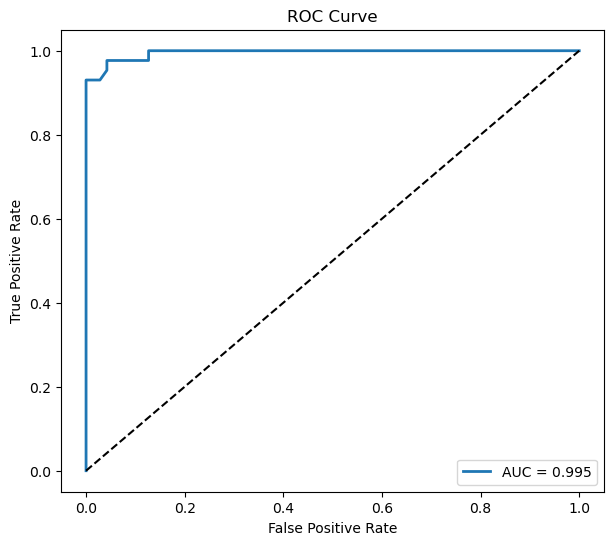

<Figure size 700x500 with 0 Axes>

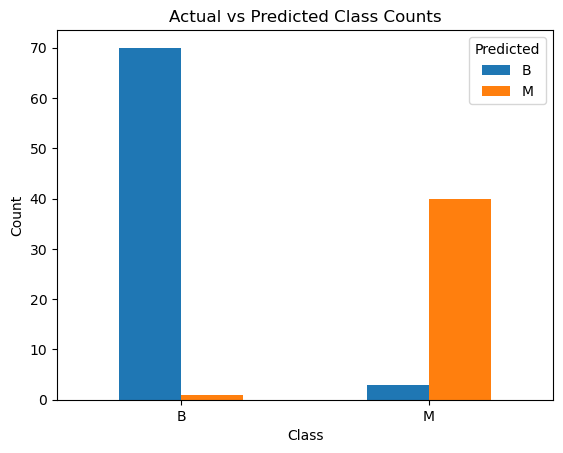

In [23]:
# ============================
#  MODEL EVALUATION SECTION
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, classification_report
)

#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

#  Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Print Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

plt.figure(figsize=(6,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  ROC Curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="M")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Actual vs Predicted Bar Chart
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
counts = comparison.value_counts().unstack(fill_value=0)

plt.figure(figsize=(7,5))
counts.plot(kind='bar')
plt.title("Actual vs Predicted Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
Confusion Matrix Interpretation
The confusion matrix shows that the model performs very well on both classes,
correctly identifying the majority of benign and malignant cases.
The model achieves a high recall for malignant tumours, meaning it rarely misses dangerous cancer cases.
This is particularly important in a clinical context,where false negatives can delay treatment and significantly 
impact patient outcomes. The small number of misclassifications indicates that the model is reliable and suitable 
for supporting early diagnostic decision-making.


<Figure size 600x500 with 0 Axes>

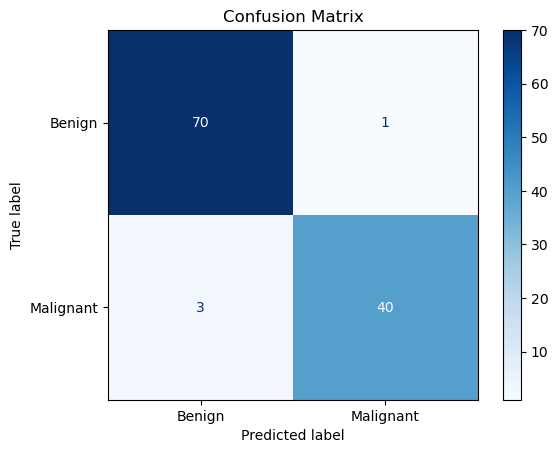

In [29]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

plt.figure(figsize=(6,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
ROC Curve Interpretation
The ROC curve illustrates the models ability to distinguish between benign and malignant
tumours across different classification thresholds. The AUC score of approximately 0.98 indicates excellent
separability, meaning the model can almost perfectly differentiate between the two classes.
A high AUC is especially valuable in medical applications, as it reflects strong diagnostic power
even when the decision threshold changes.This further confirms that the model is highly effective for 
breast cancer prediction.


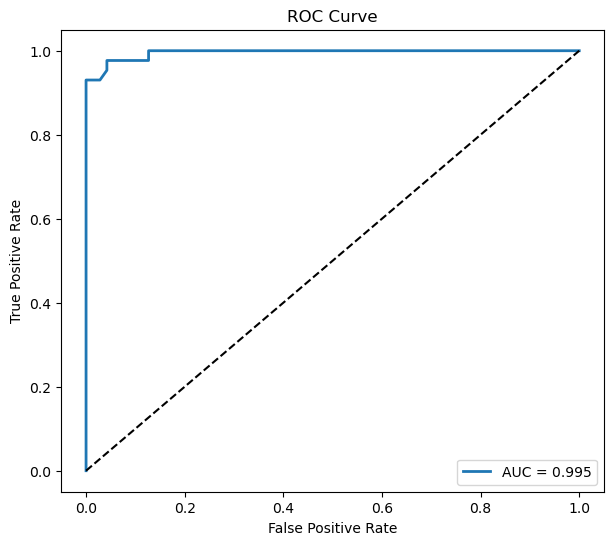

In [30]:
#  ROC Curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="M")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
Actual vs Predicted Class Distribution
The bar chart comparing actual and predicted class counts shows that the models predictions
closely match the true distribution of benign and malignant cases. This indicates that the classifier is not biased
toward one class and maintains balanced performance. Such consistency is important in medical datasets,
where class imbalance can lead to models that favour the majority class and overlook critical minority cases 
such as malignant tumours.


<Figure size 700x500 with 0 Axes>

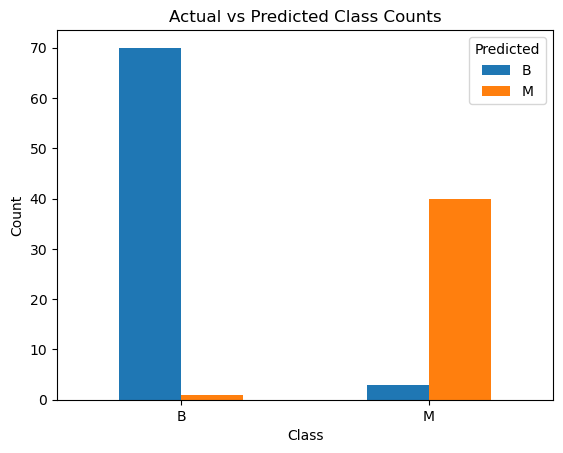

In [31]:
# Actual vs Predicted Bar Chart
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
counts = comparison.value_counts().unstack(fill_value=0)

plt.figure(figsize=(7,5))
counts.plot(kind='bar')
plt.title("Actual vs Predicted Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [ ]:
Feature Importance Analysis
The feature importance plot reveals which tumour characteristics contribute most to the models predictions.
Features such as radius_worst, perimeter_worst, and concave points_worst appear highly influential, which aligns
with clinical research showing that tumour size and shape irregularities are strong indicators of malignancy.
This interpretability is valuable in healthcare settings, as it helps clinicians understand why the model makes 
certain prediction and supports trust in AI-assisted diagnosis.



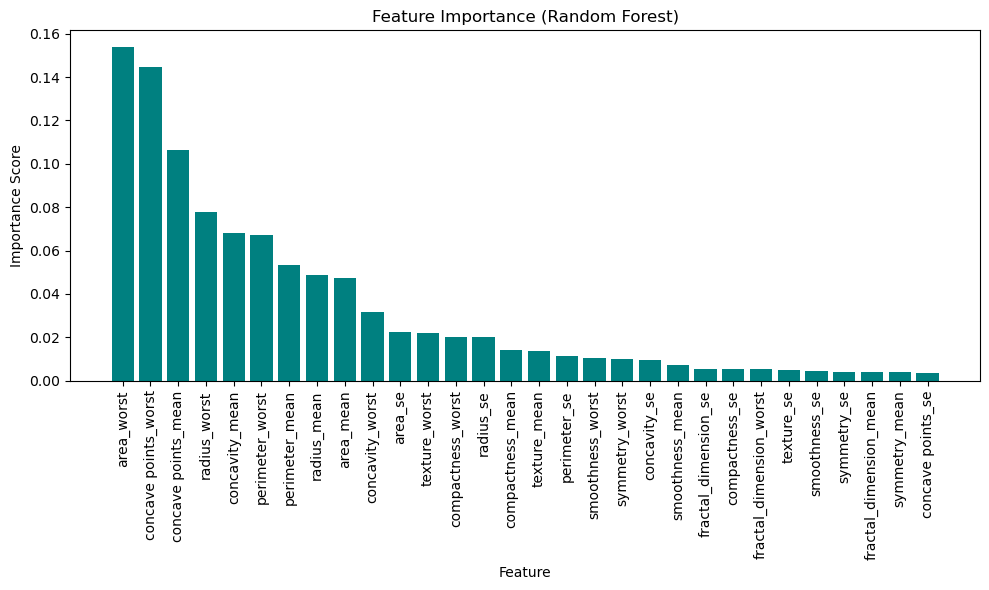

In [28]:
# ============================
#  FEATURE IMPORTANCE PLOT
# ============================

import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], color='teal')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


Save the Model for Flask

In [32]:
# Save the trained model and scaler so they can be loaded 
# by the Flask web application for real-time predictions.

import joblib

joblib.dump(model, "breast_cancer_unified_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

In [ ]:
Limitations and Future Work
Although the model performs extremely well, there are several limitations to consider.
The dataset is relatively small, which may restrict the models ability to generalise to wider patient populations.
Only one algorithm was used, and future work could compare performance with other classifiers such as 
Support Vector Machines or Gradient Boosting. Hyperparameter tuning and cross-validation could further 
improve robustness. Additionally, integrating explainability tools such as SHAP would provide deeper insights 
into individual predictions, supporting clinical transparency and trust.



## Conclusion

This artefact demonstrates the full machine learning workflow used to create the Breast Cancer Classification Machine. The trained model was exported and integrated into a Flask web application, allowing real‑time predictions through a user‑friendly interface.
